In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Steam 200 Bin Kullanıcıya ait oyun oynama saat veri seti

In [3]:
df = pd.read_csv("../dataset/steam-200k.csv",names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df.head()

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
UserID    200000 non-null int64
Game      200000 non-null object
Action    200000 non-null object
Hours     200000 non-null float64
Other     200000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [5]:
df.isnull().values.any() #null deger yok

False

In [6]:
df=df[df.Action != 'purchase']# satın alma verisi silindi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,70489.0,1.058812e+08,7.150365e+07,5250.0,49342564.0,91690667.0,155673786.0,309903146.0
Hours,70489.0,4.887806e+01,2.293352e+02,0.1,1.0,4.5,19.1,11754.0
Other,70489.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [8]:
print("Toplam oyun sayısı : {0}".format(len(df.Game.unique())))
print("Toplam kullanıcı sayısı: {0}".format(len(df.UserID.unique())))

Toplam oyun sayısı : 3600
Toplam kullanıcı sayısı: 11350


In [29]:
total_user_game = df.groupby('Game')['UserID'].agg('count').sort_values(ascending=False)[0:20] #oyun ismine göre kaç kullanıcı oldugunu gruplandı
total_user_game

Game
Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Terraria                            460
Portal 2                            453
Warframe                            424
Portal                              417
Robocraft                           407
PAYDAY 2                            390
Borderlands 2                       386
Half-Life 2                         356
Heroes & Generals                   335
War Thunder                         303
Name: UserID, dtype: int64

In [30]:
total_hours = df.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)[0:20]#oynama saatleri
total_hours

Game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Football Manager 2013                           32308.6
Football Manager 2012                           30845.8
Football Manager 2014                           30574.8
Terraria                                        29951.8
Warframe                                        27074.6
Football Manager 2015                           24283.1
Arma 3                                          24055.7
Grand Theft Auto V                         

In [31]:
total_user_game = pd.DataFrame({'game': total_user_game.index, 'total user game': total_user_game.values})
total_hours = pd.DataFrame({'game': total_hours.index, 'total time': total_hours.values})

In [32]:
total_user_game.head()
total_hours.head()

,game,total time
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3


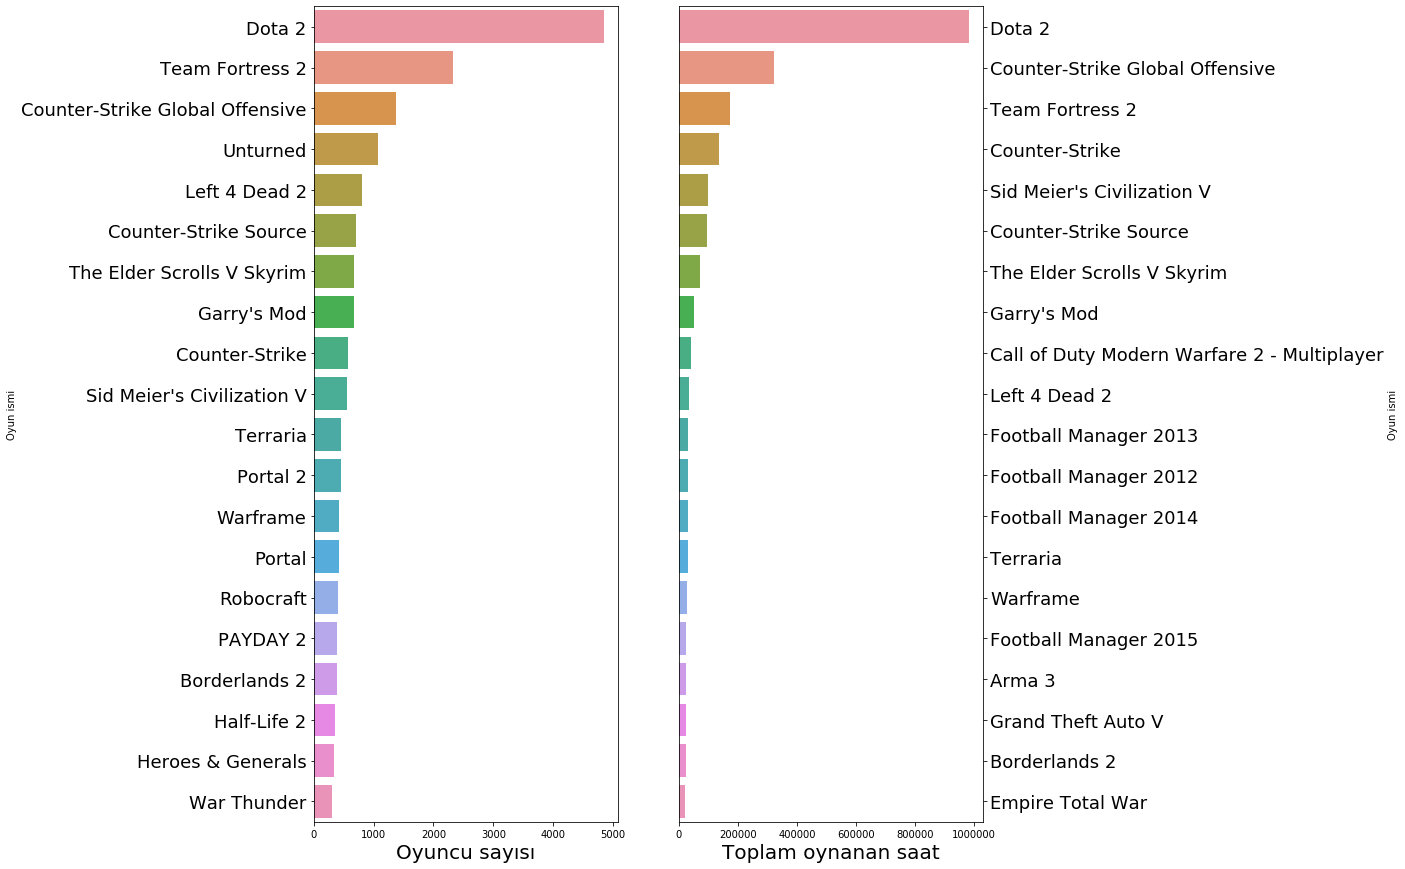

In [38]:
fig, ax =plt.subplots(1,2,figsize=(12,15))
sns.barplot(y = 'game', x = 'total user game', data = total_user_game, ax=ax[0])
sns.barplot(y = 'game', x = 'total time', data = total_hours, ax=ax[1])
ax[0].set(xlabel='Oyuncu sayısı', ylabel='Oyun ismi')
ax[1].set(xlabel='Toplam oynanan saat', ylabel='Oyun ismi')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

In [51]:
df = pd.read_csv("../dataset/steam-200k.csv",names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df_purchased_games = df.loc[df['Action'] == 'purchase'] #satın alanlar
df_played_games = df.loc[df['Action'] == 'play'] # oynayanlar
df_purchased_games

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
2,151603712,Fallout 4,purchase,1.0,0
4,151603712,Spore,purchase,1.0,0
6,151603712,Fallout New Vegas,purchase,1.0,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
...,...,...,...,...,...
199990,128470551,Fallen Earth,purchase,1.0,0
199992,128470551,Magic Duels,purchase,1.0,0
199994,128470551,Titan Souls,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0


In [62]:
#satın alınan oyunlar hesaplandı
total_user_count = df_purchased_games.groupby('UserID')['Action'].agg('count').sort_values(ascending=False)#satın aşonöa
#total oynanan oyunların sayısı 
total_hours_played = df_played_games.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False) #kullanıcıların toplam oynama sayısı
total_hours_played

UserID
73017395     11754.0
10599862     11651.7
100630947    10853.2
26762388     10470.1
153382649     9640.0
              ...   
154531790        0.1
285316500        0.1
154245235        0.1
195559468        0.1
161085459        0.1
Name: Hours, Length: 11350, dtype: float64

In [63]:
#data frame yarat/ sözlük verisinden 2 veri çek
user_df_purchased_games = pd.DataFrame({'UserID': total_user_count.index, 'nb_purchased_games': total_user_count.values})
user_df_hours_played = pd.DataFrame({'UserID': total_hours_played.index, 'hours_played': total_hours_played.values})

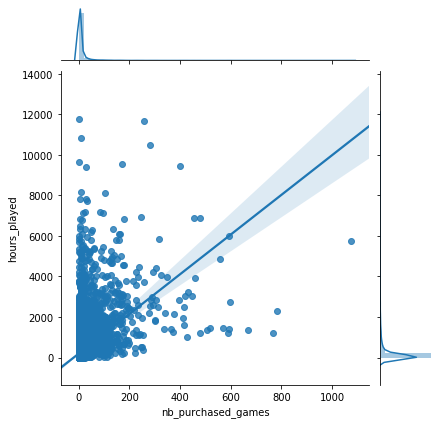

In [64]:
data = pd.merge(user_df_purchased_games, user_df_hours_played, on='UserID')  #birleştirme işlemi
sns.jointplot(x="nb_purchased_games", y="hours_played", data=data,kind="reg")

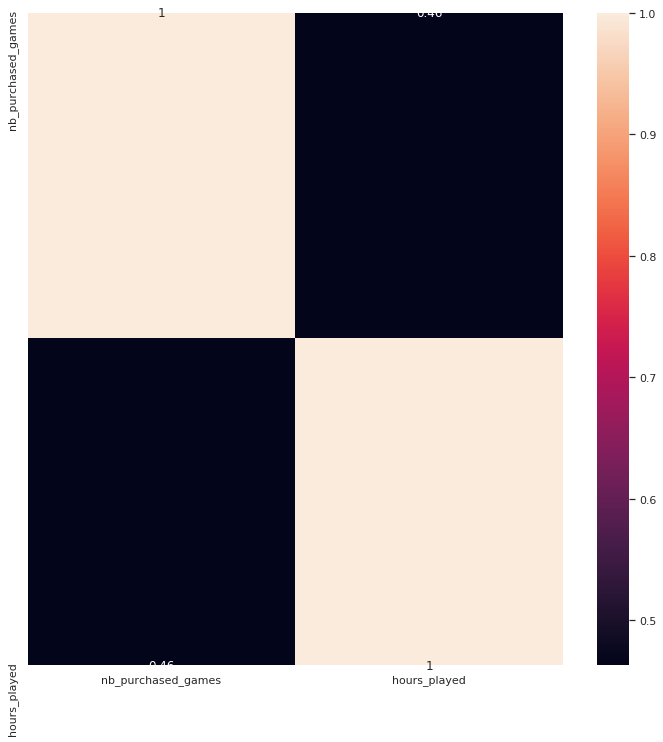

In [73]:
sns.heatmap(data.corr(),annot=True)